# Feature importances estimation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [2]:
import math
import itertools
import optunity
import optunity.metrics
import sklearn.svm

In [3]:
file = pd.read_csv('train2.csv')
y=file['critical_temp']
x= file.drop(['critical_temp'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)







#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

y_train = sc_y.fit_transform(np.asarray(y_train).reshape(-1, 1))
y_test = sc_y.fit_transform(np.asarray(y_test).reshape(-1, 1))

#Y = sc_y.fit_transform(np.asarray(y).reshape(-1, 1))


In [19]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',C=4)
regressor.fit(X_train, y_train)

C:\Users\Hamzah\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=4)

In [20]:
Y_pred = regressor.predict(X_test) 

In [23]:
Y_pred=sc_y.inverse_transform(Y_pred.reshape(-1, 1))
y_test=sc_y.inverse_transform(y_test.reshape(-1, 1))

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
print("RMSE: %f" % (rmse))

RMSE: 12.450210


In [25]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, Y_pred)

In [26]:
coefficient_of_dermination

0.8573633326202061

In [30]:
y_test=pd.DataFrame(y_test)
y_test['Predicted']=Y_pred

In [31]:
y_test

,0,Predicted
0,2.13,3.126226
1,11.77,10.293575
2,1.51,1.803436
3,58.00,82.456217
4,130.00,102.778089
...,...,...
773,9.00,6.854665
774,55.60,44.731829
775,68.00,93.832363
776,100.00,95.090657


In [32]:
    
df = pd.DataFrame(y_test)

In [33]:
df.to_excel('SVM.xlsx')

In [122]:
Y_pred=sc_y.inverse_transform(Y_pred.reshape(-1, 1))

In [116]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, Y_pred)

In [117]:
coefficient_of_dermination

0.8437514916768801

In [118]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_test, Y_pred)
 
RMSE = math.sqrt(MSE)
RMSE

13.030737972689694

In [119]:
Y_pred=pd.DataFrame(Y_pred)

In [120]:
y_test=pd.DataFrame(y_test)
y_test['Predicted']=Y_pred

In [92]:
dict = {'Predicted Critical Temperature':Y_pred , 'Real Crtitical Temperature': y_test} 
    
df = pd.DataFrame(dict)

In [93]:
df.to_excel('svm_result.xlsx')

In [12]:
outer_cv = optunity.cross_validated(x=file, y=y, num_folds=3)

def compute_mse_standard(x_train, y_train, x_test, y_test):
    """Computes MSE of an SVR with RBF kernel and default hyperparameters.
    """
    model = sklearn.svm.SVR().fit(x_train, y_train)
    predictions = model.predict(x_test)
    return optunity.metrics.mse(y_test, predictions)

# wrap with outer cross-validation
compute_mse_standard = outer_cv(compute_mse_standard)

In [13]:
compute_mse_standard()

KeyError: 3320

In [2]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
file = pd.read_csv('train2.csv')
y=file['critical_temp']
x= file.drop(['critical_temp'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

In [3]:
file.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [14]:
# decision tree for feature importance on a regression problem
y=low_temperature['critical_temp']
index_1=low_temperature.columns.tolist()[0:-1]
X=low_temperature[index_1]
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_


In [15]:
features=pd.DataFrame(data={'Features':index_1,'importance':importance})
features

,Features,importance
0,number_of_elements,0.000010
1,mean_atomic_mass,0.003407
2,wtd_mean_atomic_mass,0.012673
3,gmean_atomic_mass,0.001508
4,wtd_gmean_atomic_mass,0.002014
...,...,...
76,wtd_entropy_Valence,0.002815
77,range_Valence,0.000380
78,wtd_range_Valence,0.028092
79,std_Valence,0.000625


In [16]:
features=features.sort_values(by='importance',ascending=False)

In [17]:
features

,Features,importance
67,range_ThermalConductivity,0.496504
64,wtd_gmean_ThermalConductivity,0.106343
31,mean_Density,0.030617
78,wtd_range_Valence,0.028092
35,entropy_Density,0.023792
...,...,...
13,gmean_fie,0.000286
57,range_FusionHeat,0.000277
27,range_atomic_radius,0.000156
71,mean_Valence,0.000085


In [22]:
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]

In [23]:
features=features.drop_duplicates(subset=['Features'], keep='first')

In [24]:
features=features[['Features','importance']]

In [25]:
features

,Features,importance
67,ThermalConductivity,0.496504
31,Density,0.030617
78,Valence,0.028092
47,ElectronAffinity,0.015470
12,fie,0.015066
56,FusionHeat,0.014199
2,mass,0.012673
30,radius,0.008696
0,elements,0.000010


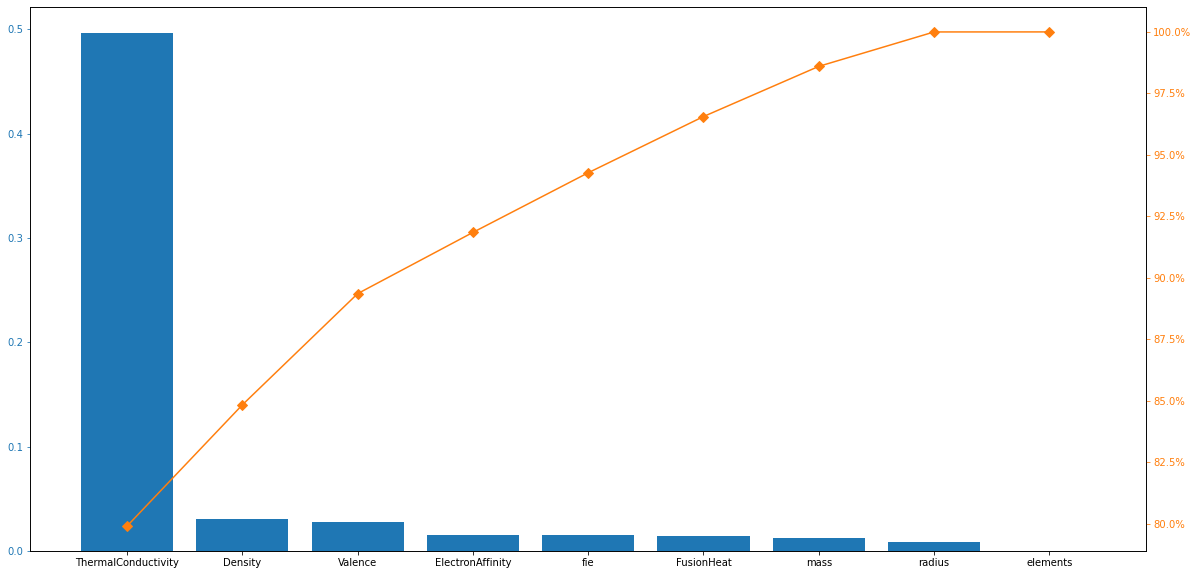

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


features["cumpercentage"] = features["importance"].cumsum()/features["importance"].sum()*100


fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(features['Features'], features["importance"], color="C0")
ax2 = ax.twinx()
ax2.plot(features['Features'], features["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

## Division of low temperature superconductor based on distribution

## Superconductor below 20K critical temperature

In [27]:
low_temperature_ultra=low_temperature[low_temperature['critical_temp'] <= 20]
y=low_temperature_ultra['critical_temp']
index_1=low_temperature_ultra.columns.tolist()[0:-1]
X=low_temperature_ultra[index_1]
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_


In [96]:
importance

array([3.23989950e-05, 1.63267391e-03, 6.12280603e-02, 2.39126506e-03,
       1.25073972e-02, 9.65010954e-03, 5.84358226e-03, 1.25672262e-03,
       1.21010315e-02, 3.10117525e-03, 6.00860835e-03, 1.13114178e-02,
       1.25257177e-02, 2.30286654e-03, 6.37055629e-03, 7.64012942e-03,
       4.84673851e-03, 1.74398407e-01, 5.03910380e-03, 7.84683795e-03,
       1.10547352e-02, 3.58289890e-03, 1.98807309e-02, 1.69131890e-03,
       1.40397084e-02, 8.93140797e-03, 7.19808682e-03, 2.49599995e-03,
       4.41810333e-02, 8.90667974e-03, 1.10961451e-02, 6.42690603e-04,
       5.42945413e-03, 4.01077595e-03, 4.39843624e-03, 3.46169426e-04,
       4.67967925e-03, 7.91107621e-04, 6.69608998e-03, 1.90960533e-03,
       1.26434514e-02, 1.80278656e-03, 5.33307377e-03, 2.92651551e-03,
       2.95750218e-02, 5.45719894e-03, 6.62134809e-03, 5.77004868e-04,
       9.10511364e-03, 2.16223404e-03, 1.18963065e-02, 9.12728283e-03,
       8.31551467e-03, 3.66413205e-03, 4.64072837e-02, 4.98016144e-03,
      

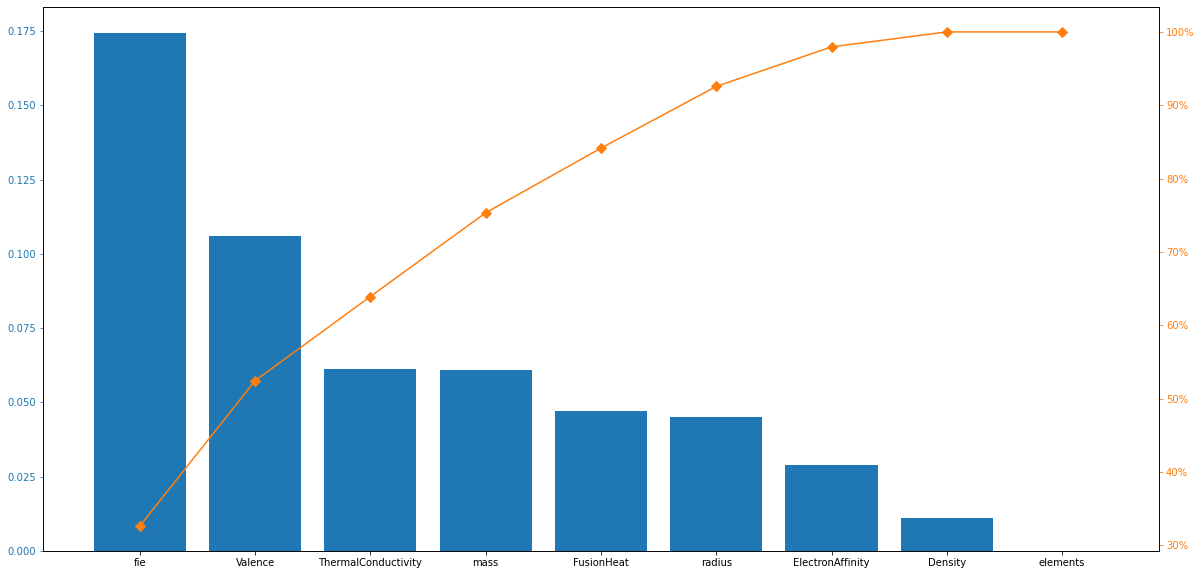

In [28]:

features=pd.DataFrame(data={'Features':index_1,'importance':importance})
features=features.sort_values(by='importance',ascending=False)
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features=features.drop_duplicates(subset=['Features'], keep='first')
features=features[['Features','importance']]
features["cumpercentage"] = features["importance"].cumsum()/features["importance"].sum()*100

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(features['Features'], features["importance"], color="C0")
ax2 = ax.twinx()
ax2.plot(features['Features'], features["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

## For superconductor with critical temperature above 20K

In [29]:
low_temperature_2=low_temperature[low_temperature['critical_temp'] > 20]
y=low_temperature_2['critical_temp']
index_1=low_temperature_2.columns.tolist()[0:-1]
X=low_temperature_2[index_1]
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_


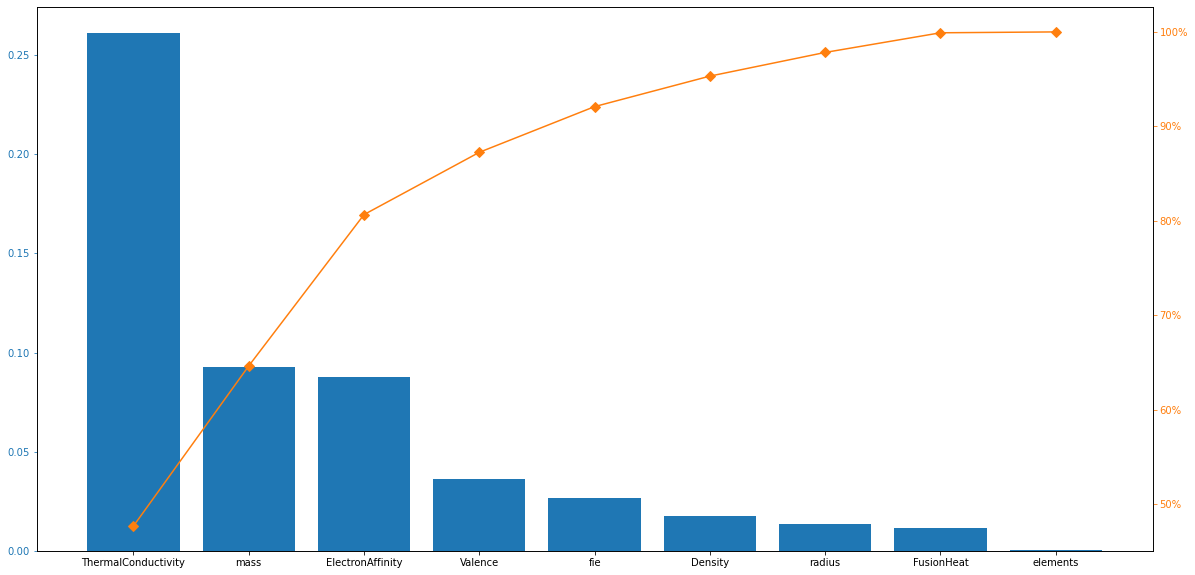

In [30]:

features=pd.DataFrame(data={'Features':index_1,'importance':importance})
features=features.sort_values(by='importance',ascending=False)
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]

features=features.drop_duplicates(subset=['Features'], keep='first')
features=features[['Features','importance']]
features["cumpercentage"] = features["importance"].cumsum()/features["importance"].sum()*100

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(features['Features'], features["importance"], color="C0")
ax2 = ax.twinx()
ax2.plot(features['Features'], features["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

# Prediction

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [5]:
from sklearn.preprocessing import StandardScaler


In [6]:
file = pd.read_csv('train.csv')
y=file['critical_temp']
x= file.drop(['critical_temp'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

In [11]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test= sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = sc_y.fit_transform(np.array(y_test).reshape(-1, 1))

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\Hamzah\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [15]:
y_test.shape

(1064, 1)

In [16]:
y_pred = regressor.predict(X_test) 

In [17]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test, y_pred)

In [18]:
error

0.1672717204725213

In [33]:
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)

In [34]:
regressor.fit(X_train, y_train)  


RandomForestRegressor(n_estimators=1000, random_state=0)

In [35]:
Y_pred = regressor.predict(X_test) 

In [36]:
error=mean_absolute_percentage_error(y_test, Y_pred)

In [39]:
error

1.492219609990375